# Linear Regression on zirconia price

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

from sklearn.linear_model import LinearRegression,LogisticRegression
from statsmodels.formula.api import ols
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_curve,roc_auc_score,mean_squared_error,plot_confusion_matrix,plot_precision_recall_curve

## Reading the data and EDA

In [627]:
df1=pd.read_csv('cubic_zirconia.csv',index_col=0)
df1.head(15)

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779
6,1.02,Ideal,D,VS2,61.5,56.0,6.46,6.49,3.99,9502
7,1.01,Good,H,SI1,63.7,60.0,6.35,6.30,4.03,4836
8,0.50,Premium,E,SI1,61.5,62.0,5.09,5.06,3.12,1415
9,1.21,Good,H,SI1,63.8,64.0,6.72,6.63,4.26,5407
10,0.35,Ideal,F,VS2,60.5,57.0,4.52,4.60,2.76,706


| Variable Name | Description                                                                                                                                         |
| ------------- | --------------------------------------------------------------------------------------------------------------------------------------------------- |
| Carat         |  Carat weight of the cubic zirconia.|
| Cut           |  Describe the cut quality of the cubic zirconia. Quality is increasing order Fair, Good, Very Good, Premium, Ideal.                                 |
| Color         |  Colour of the cubic zirconia.With D being the worst and J the best.                                                                                |
| Clarity       |  cubic zirconia Clarity refers to the absence of the Inclusions and Blemishes. (In order from Worst to Best) IF, VVS1, VVS2, VS1, VS2, Sl1, Sl2, l1 |
| Depth         |  The Height of cubic zirconia, measured from the Culet to the table, divided by its average Girdle Diameter.                                        |
| Table         |  The Width of the cubic zirconia's Table expressed as a Percentage of its Average Diameter.                                                         |
| Price         |  the Price of the cubic zirconia.                                                                                                                   |
| X             |  Length of the cubic zirconia in mm.                                                                                                                |
| Y             |  Width of the cubic zirconia in mm.                                                                                                                 |
| Z             |  Height of the cubic zirconia in mm.                                                                                                                |


In [628]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26967 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 2.3+ MB


Column depth has 26270 non null values so null values are present

In [629]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [631]:
df1[df1.duplicated()].shape

(34, 10)

In [518]:
df1.drop_duplicates(keep='first',inplace=True)

In [519]:
num_cols=df1.dtypes[df1.dtypes !='object'].index

E:\ProgramFiles\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ProgramFiles\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ProgramFiles\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

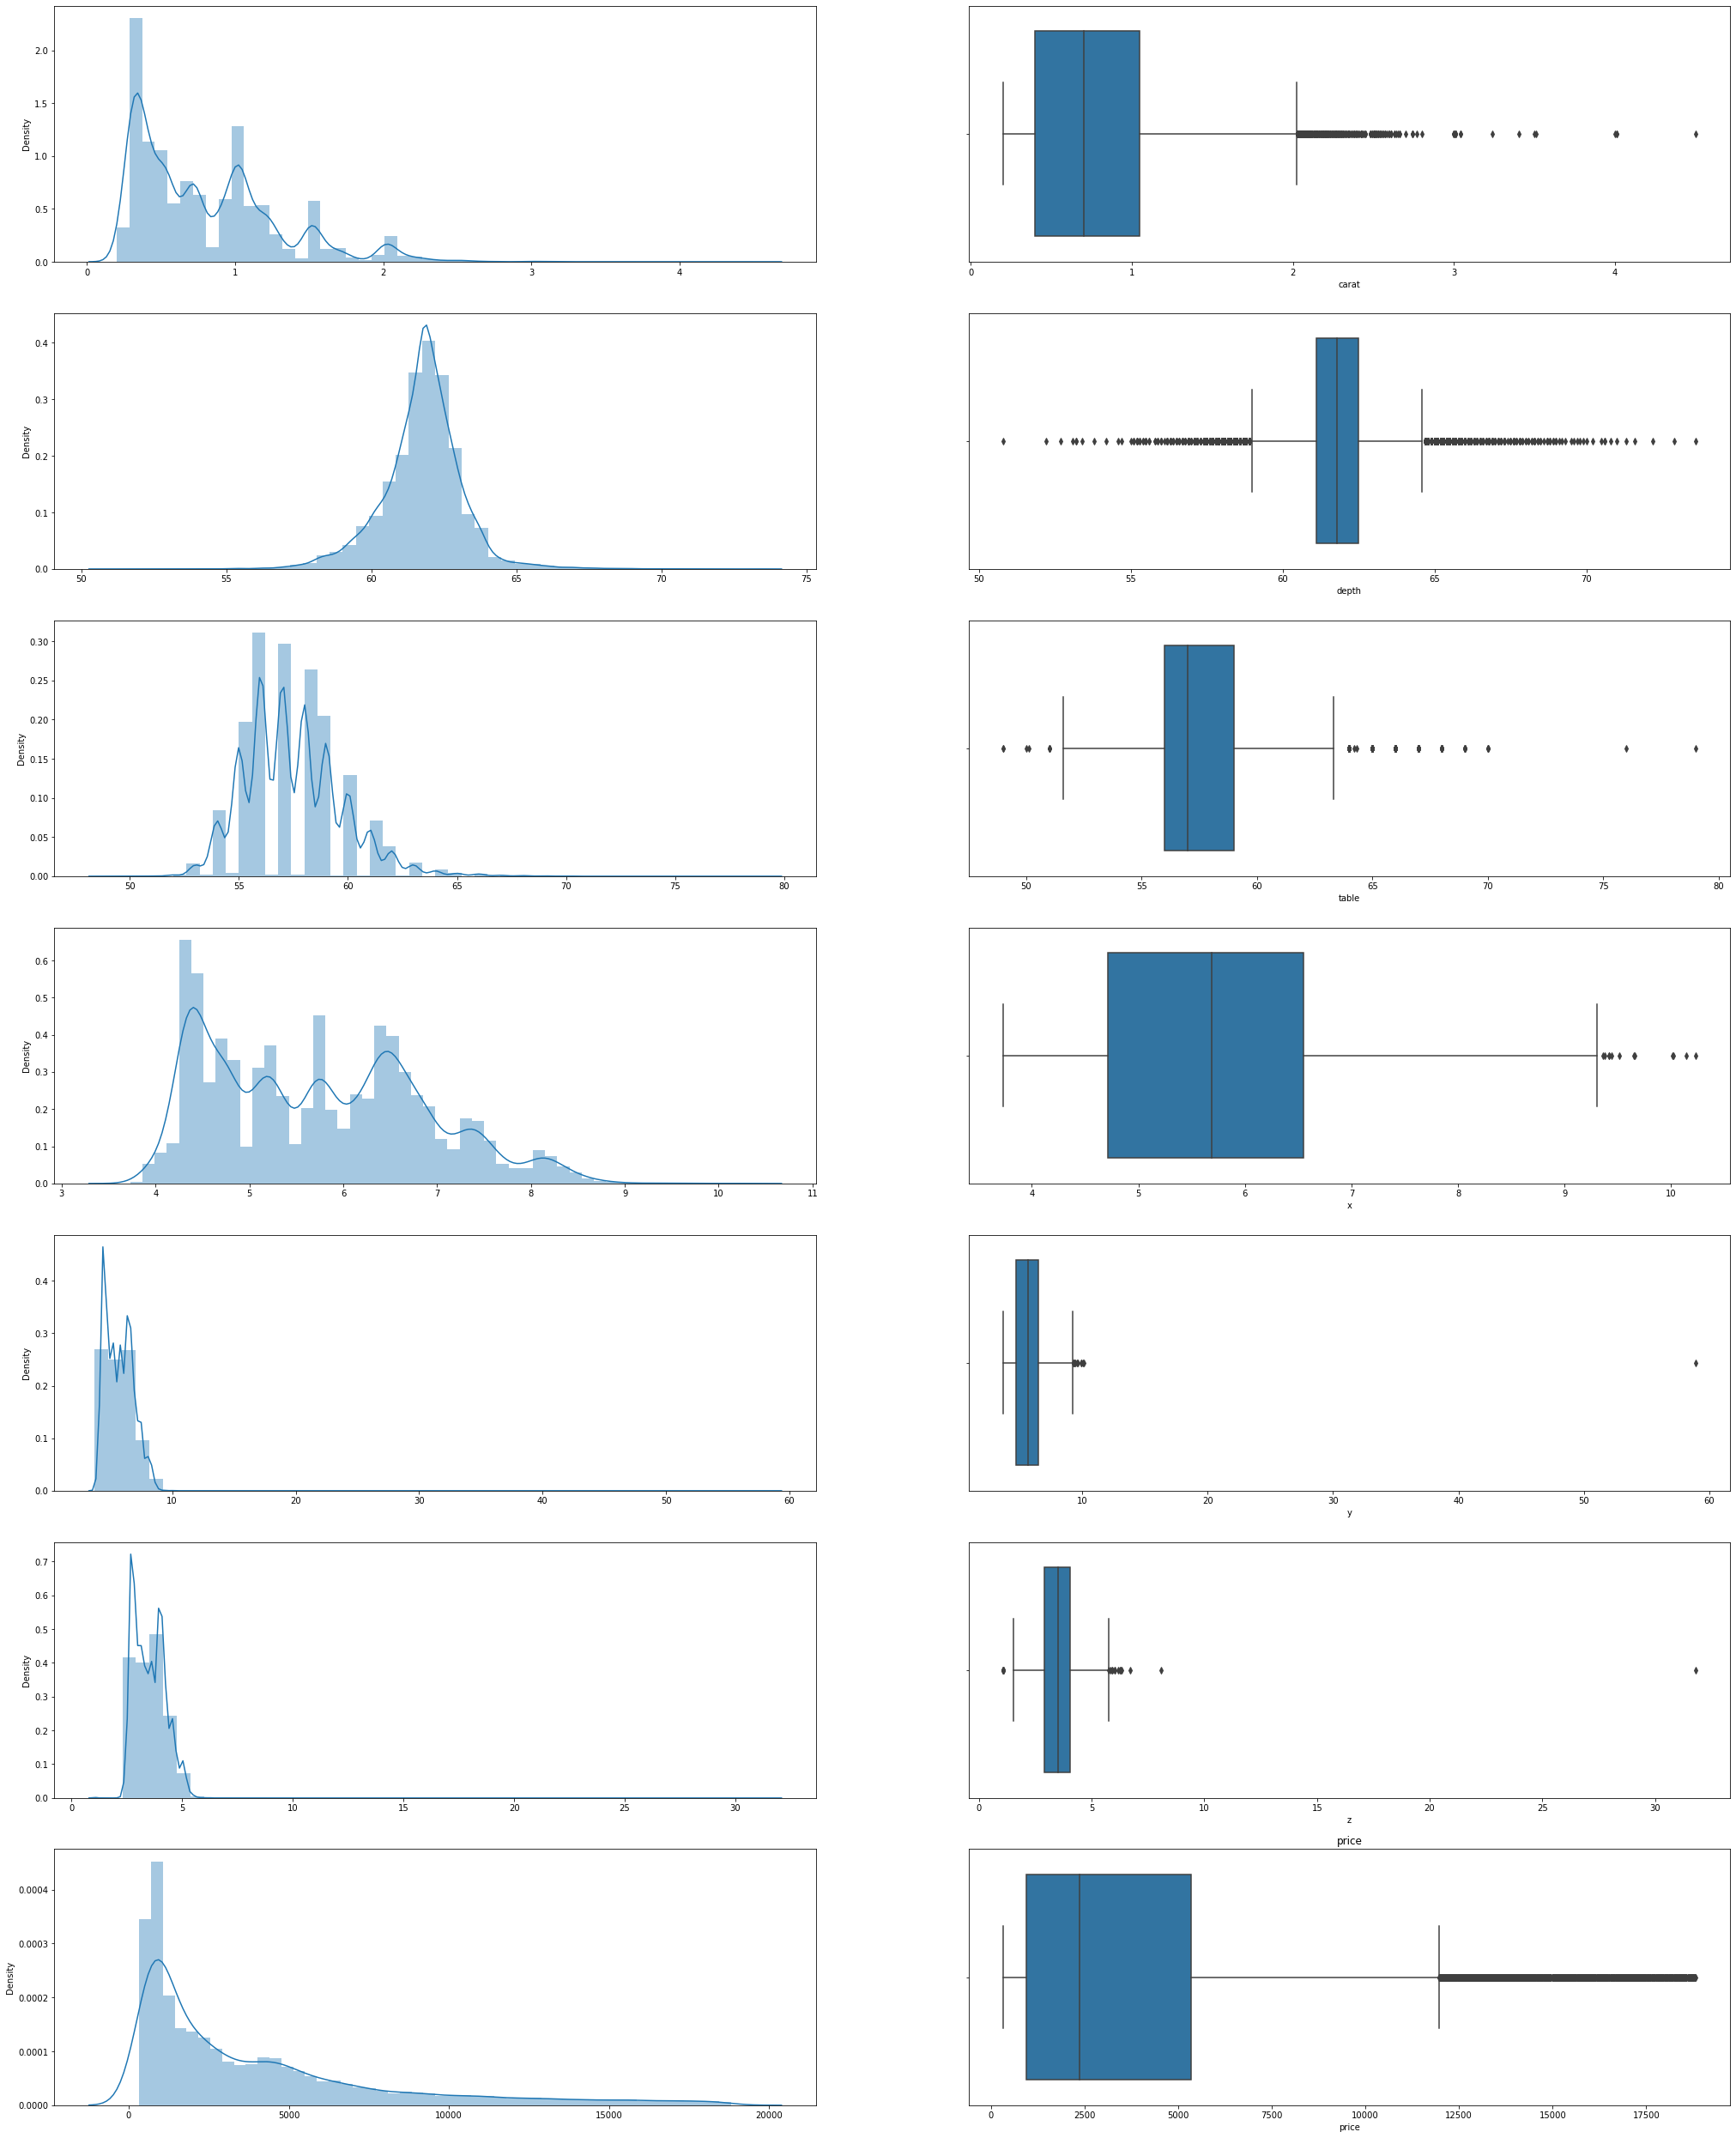

In [625]:
fig,ax=plt.subplots(7,2,figsize=(35,45))
#plt.figure(figsize=(20,15))
for idx,col in enumerate(num_cols):
    #plt.subplot(3,3,idx+1)
    sns.distplot(x=df1[col],kde=True,ax=ax[idx][0],label=col)
    plt.title(col)
    sns.boxplot(df1[col],ax=ax[idx][1])

In [522]:
df1.skew()

carat    1.114789
depth   -0.026086
table    0.765805
x        0.392290
y        3.867764
z        2.580665
price    1.619116
dtype: float64

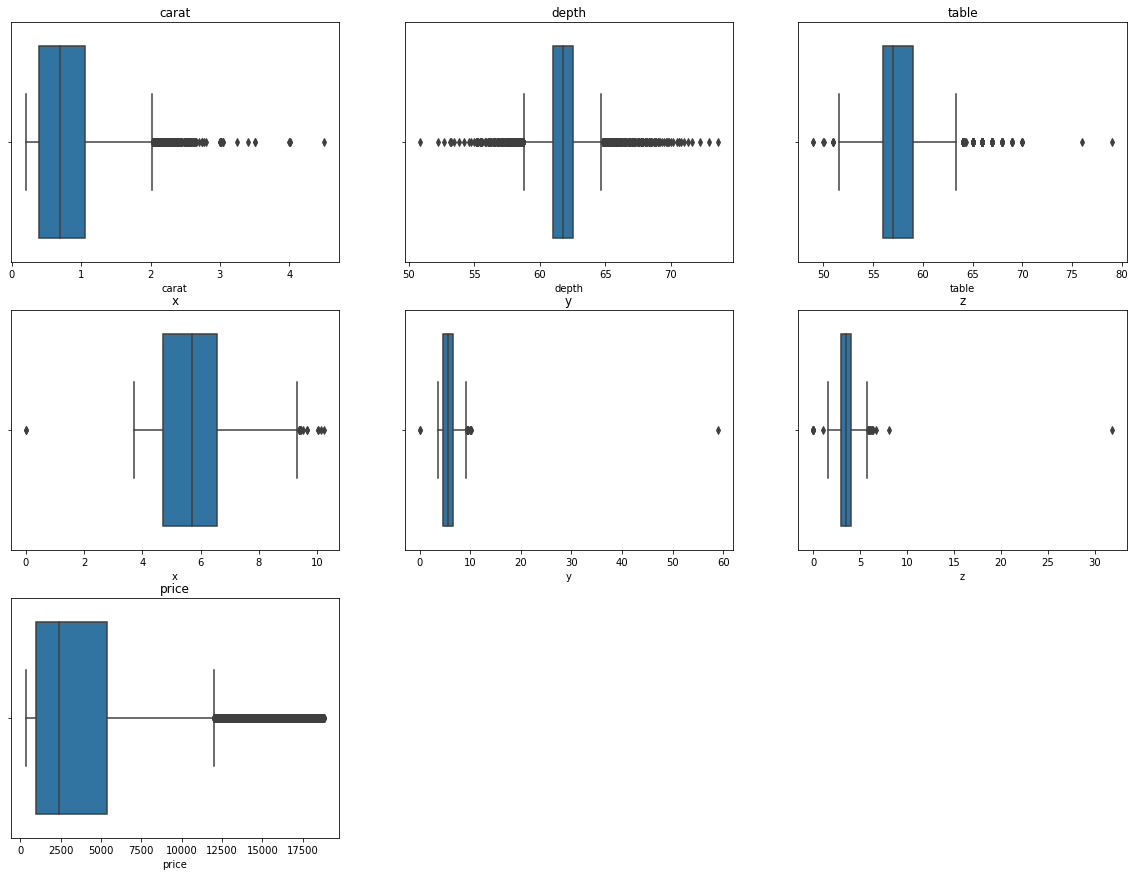

In [523]:
plt.figure(figsize=(20,15))
for idx,col in enumerate(num_cols):
    plt.subplot(3,3,idx+1)
    sns.boxplot(x=df1[col])
    plt.title(col)
    

In [35]:
def q1_q3(x):
    q1,q3=x.quantile([0.25,0.75])
    iqr=q3-q1
    
    upper_limit=q3+(1.5*iqr)
    lower_limit=q1-(1.5*iqr)
    
    return (x < lower_limit).sum(),(x > upper_limit).sum()

In [525]:
df1[num_cols].apply(q1_q3,axis=0).T.rename(columns={0:'Lower_range',1:'Upper range'})

,Lower_range,Upper range
carat,0,657
depth,733,486
table,8,310
x,2,12
y,2,12
z,9,13
price,0,1778


In [526]:
(df1==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          2
y          2
z          8
price      0
dtype: int64

In [527]:
df1[(df1.x==0)|(df1.y==0)|(df1.z==0)]

,carat,cut,color,clarity,depth,table,x,y,z,price
5822,0.71,Good,F,SI2,64.1,60.0,0.00,0.00,0.0,2130
6035,2.02,Premium,H,VS2,62.7,53.0,8.02,7.95,0.0,18207
10828,2.20,Premium,H,SI1,61.2,59.0,8.42,8.37,0.0,17265
12499,2.18,Premium,H,SI2,59.4,61.0,8.49,8.45,0.0,12631
12690,1.10,Premium,G,SI2,63.0,59.0,6.50,6.47,0.0,3696
17507,1.14,Fair,G,VS1,57.5,67.0,0.00,0.00,0.0,6381
18195,1.01,Premium,H,I1,58.1,59.0,6.66,6.60,0.0,3167
23759,1.12,Premium,G,I1,60.4,59.0,6.71,6.67,0.0,2383


In [528]:
#df1.x=df1.x.replace(0,np.nan)
df1[['x','y','z']]=df1[['x','y','z']].apply(lambda x : x.replace(0,np.nan),axis=0)

In [529]:
(df1==0).sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [530]:
df1.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            2
y            2
z            8
price        0
dtype: int64

In [531]:
df1[['x','y','z']]=df1[['x','y','z']].apply(lambda x : x.fillna(np.min(x)),axis=0)

In [532]:
df1.describe()

,carat,depth,table,x,y,z,price
count,26933.000000,26236.000000,26933.000000,26933.000000,26933.000000,26933.000000,26933.000000
mean,0.798010,61.745285,57.455950,5.729623,5.733377,3.538087,3937.526120
std,0.477237,1.412243,2.232156,1.126417,1.164120,0.718637,4022.551862
min,0.200000,50.800000,49.000000,3.730000,3.710000,1.070000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.700000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5356.000000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [533]:
df1.isna().sum()

carat        0
cut          0
color        0
clarity      0
depth      697
table        0
x            0
y            0
z            0
price        0
dtype: int64

In [534]:
df1['depth']=df1.depth.fillna(df1.depth.median())

## Impact of Carat on Price

Text(0.5, 1.0, 'Carat vs Price')

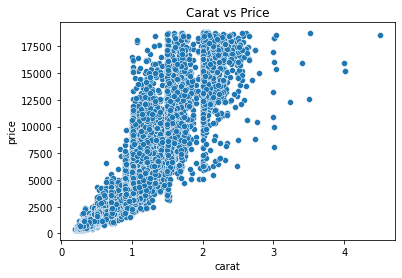

In [535]:
sns.scatterplot(x='carat',y='price',data=df1)
plt.title('Carat vs Price')

# CUT

In [536]:
df1.cut.unique()

array(['Ideal', 'Premium', 'Very Good', 'Good', 'Fair'], dtype=object)

Text(0.5, 1.0, 'Number of Cut types')

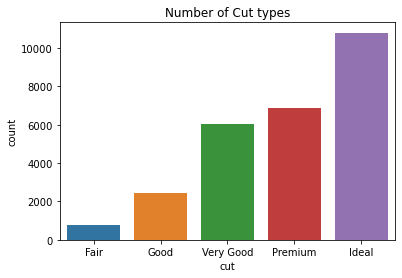

In [537]:
sns.countplot(data=df1,x='cut',order=['Fair','Good','Very Good','Premium','Ideal'])
plt.title('Number of Cut types')
#Fair, Good, Very Good, Premium, Ideal.

Text(0.5, 1.0, 'Cut vs Price')

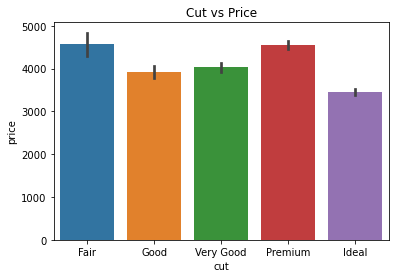

In [538]:
sns.barplot(x='cut',y='price',data=df1,estimator=np.mean,order=['Fair','Good','Very Good','Premium','Ideal'])
plt.title('Cut vs Price')

Text(0.5, 1.0, 'Cut and Price')

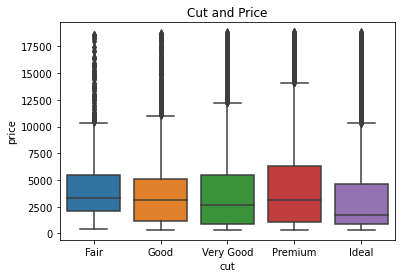

In [539]:
sns.boxplot(x='cut',y='price',data=df1,order=['Fair','Good','Very Good','Premium','Ideal',])
plt.title('Cut and Price')

## COLOR 

In [540]:
df1.color.unique()

array(['E', 'G', 'F', 'D', 'H', 'J', 'I'], dtype=object)

E:\ProgramFiles\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of different colour types')

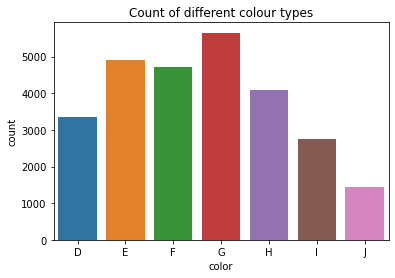

In [541]:
sns.countplot(df1.color,order=[ 'D','E','F','G', 'H','I','J'])
plt.title('Count of different colour types')

Text(0.5, 1.0, 'Color and Price')

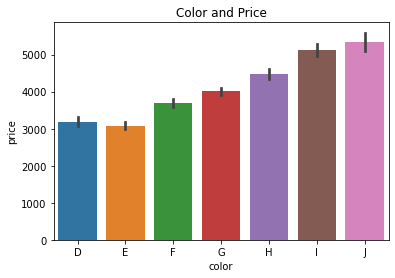

In [542]:
sns.barplot(x='color',y='price',data=df1,estimator=np.mean,order=[ 'D','E','F','G', 'H','I','J'])
plt.title('Color and Price')

## CLARITY 

In [543]:
df1.clarity.unique()

array(['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', 'VS2', 'SI2', 'I1'],
      dtype=object)

E:\ProgramFiles\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of Clarity types')

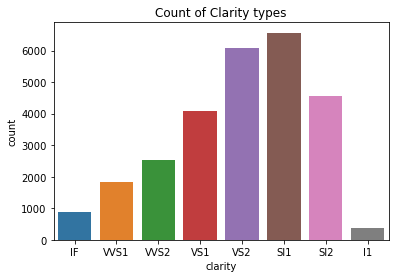

In [544]:
sns.countplot(df1.clarity,order= ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
plt.title('Count of Clarity types')

Text(0.5, 1.0, 'Clarity and Price')

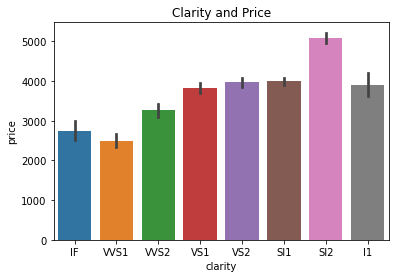

In [545]:
sns.barplot(x='clarity',y='price',data=df1,estimator=np.mean,order= ['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])
plt.title('Clarity and Price')

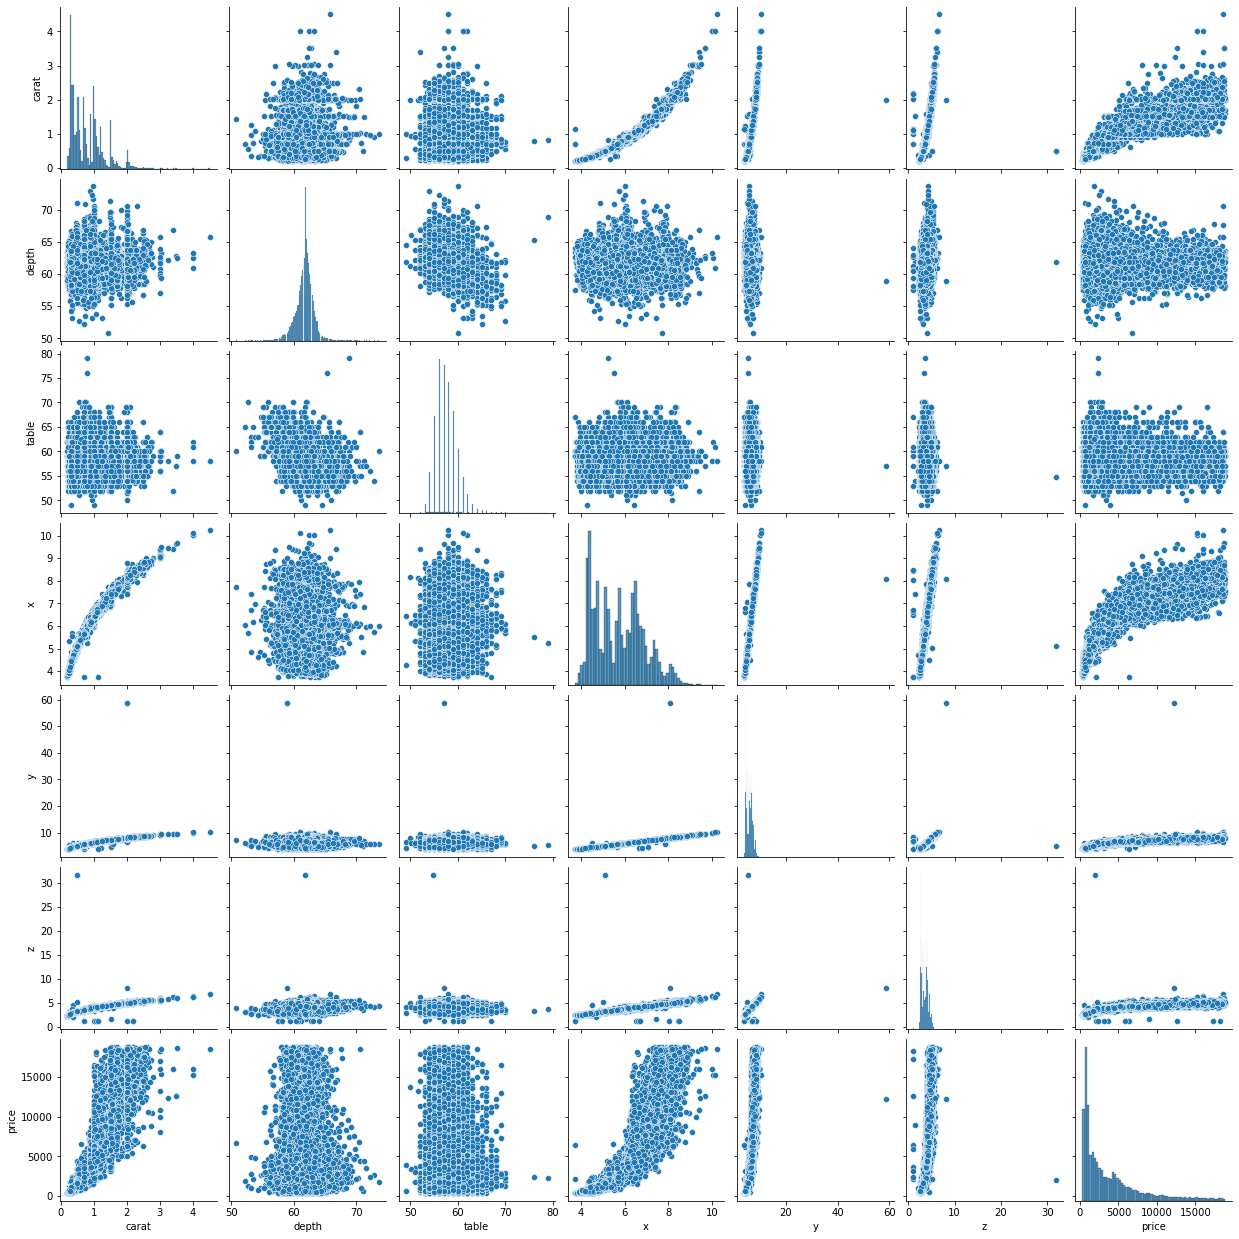

In [546]:
sns.pairplot(data=df1)

Text(0.5, 1.0, 'Depth vs price')

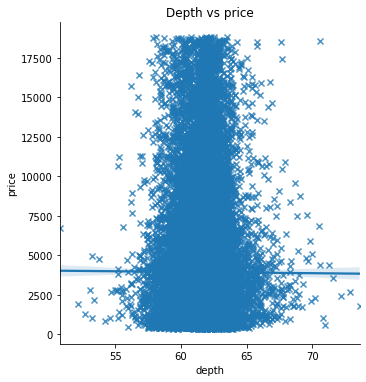

In [547]:
sns.lmplot(data=df1,x='depth',y='price',markers=['x'])
plt.title('Depth vs price')

Text(0.5, 1.0, 'Table vs price')

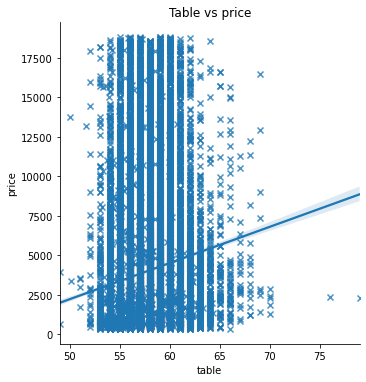

In [548]:
sns.lmplot(data=df1,x='table',y='price',markers=['x'])
plt.title('Table vs price')

Text(0.5, 1.0, 'z vs price')

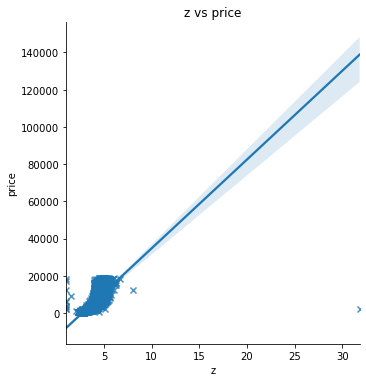

In [549]:
sns.lmplot(data=df1,x='z',y='price',markers=['x'])
plt.title('z vs price')

<AxesSubplot:>

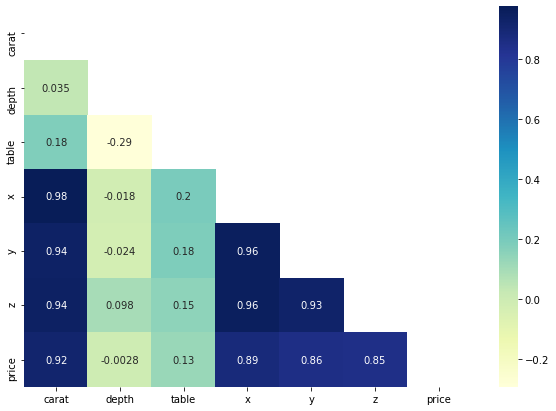

In [550]:
plt.figure(figsize=(10,7))
sns.heatmap(data=df1.corr(),mask=np.triu(df1.corr()),cmap='YlGnBu',annot=True)

In [551]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [552]:
X=df1[num_cols].drop('price',axis=1)
X

,carat,depth,table,x,y,z
1,0.30,62.1,58.0,4.27,4.29,2.66
2,0.33,60.8,58.0,4.42,4.46,2.70
3,0.90,62.2,60.0,6.04,6.12,3.78
4,0.42,61.6,56.0,4.82,4.80,2.96
5,0.31,60.4,59.0,4.35,4.43,2.65
...,...,...,...,...,...,...
26963,1.11,62.3,58.0,6.61,6.52,4.09
26964,0.33,61.9,55.0,4.44,4.42,2.74
26965,0.51,61.7,58.0,5.12,5.15,3.17
26966,0.27,61.8,56.0,4.19,4.20,2.60


In [553]:
vif=[variance_inflation_factor(X.values,ix) for ix in range(X.shape[1])]

In [554]:
for idx,col in enumerate(X.columns):
    print(col,' : ',vif[idx])

carat  :  76.39993530558635
depth  :  500.75505735215006
table  :  498.77686685086354
x  :  1057.2126125165837
y  :  347.4036605488694
z  :  346.232535029339


## ANOVA test for category variables


$H_{0}$: The mean price for all levels in the category are same

$H_{a}$: The mean price is different for atleast one of the levels in the category

In [555]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [556]:
for x in [x for x in df1.columns if x not in num_cols]:
    df1[x]=pd.Categorical(df1[x])


In [557]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    26933 non-null  float64 
 1   cut      26933 non-null  category
 2   color    26933 non-null  category
 3   clarity  26933 non-null  category
 4   depth    26933 non-null  float64 
 5   table    26933 non-null  float64 
 6   x        26933 non-null  float64 
 7   y        26933 non-null  float64 
 8   z        26933 non-null  float64 
 9   price    26933 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [558]:
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import MultiComparison,tukeyhsd

In [559]:
model=ols(formula='price~C(cut)',data=df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(cut),4.0,5.419571e+09,1.354893e+09,84.775823,1.124337e-71
Residual,26928.0,4.303651e+11,1.598207e+07,NaN,NaN


In [560]:
mc=MultiComparison(df1.price,df1.cut)
mc.tukeyhsd(0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Fair,Good,-641.7594,0.001,-1090.4474,-193.0714,True
Fair,Ideal,-1113.2755,0.001,-1517.6084,-708.9426,True
Fair,Premium,-23.5376,0.9,-435.5444,388.4691,False
Fair,Very Good,-535.8282,0.0039,-950.8116,-120.8448,True
Good,Ideal,-471.5161,0.001,-716.1592,-226.8731,True
Good,Premium,618.2218,0.001,361.094,875.3496,True
Good,Very Good,105.9312,0.7791,-155.9397,367.8021,False
Ideal,Premium,1089.7379,0.001,921.5747,1257.9011,True
Ideal,Very Good,577.4473,0.001,402.1176,752.7771,True
Premium,Very Good,-512.2906,0.001,-704.6574,-319.9237,True


In [561]:
model=ols(formula='price~C(color)',data=df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(color),6.0,1.373604e+10,2.289340e+09,146.056106,4.937471e-183
Residual,26926.0,4.220486e+11,1.567439e+07,NaN,NaN


In [562]:
mc=MultiComparison(df1.price,df1.color)
mc.tukeyhsd(0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
D,E,-110.8872,0.865,-372.624,150.8496,False
D,F,515.1169,0.001,251.2251,779.0087,True
D,G,820.2186,0.001,565.4789,1074.9582,True
D,H,1293.1045,0.001,1020.9583,1565.2507,True
D,I,1939.989,0.001,1639.8722,2240.1059,True
D,J,2144.8787,0.001,1776.8872,2512.8701,True
E,F,626.0041,0.001,388.1565,863.8518,True
E,G,931.1058,0.001,703.4549,1158.7567,True
E,H,1403.9917,0.001,1157.0176,1650.9658,True
E,I,2050.8762,0.001,1773.3825,2328.37,True


In [563]:
model=ols(formula='price~C(clarity)',data=df1).fit()
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
C(clarity),7.0,1.233425e+10,1.762036e+09,112.038668,1.160598e-162
Residual,26925.0,4.234504e+11,1.572703e+07,NaN,NaN


In [564]:
mc=MultiComparison(df1.price,df1.clarity)
mc.tukeyhsd(0.05).summary()

group1,group2,meandiff,p-adj,lower,upper,reject
I1,IF,-1169.2158,0.001,-1916.965,-421.4665,True
I1,SI1,89.8856,0.9,-557.3924,737.1637,False
I1,SI2,1180.1194,0.001,525.4297,1834.8091,True
I1,VS1,-69.9976,0.9,-727.5032,587.508,False
I1,VS2,56.747,0.9,-591.8468,705.3407,False
I1,VVS1,-1405.8756,0.001,-2095.4631,-716.2882,True
I1,VVS2,-645.7073,0.072,-1319.5553,28.1407,False
IF,SI1,1259.1014,0.001,829.9403,1688.2625,True
IF,SI2,2349.3352,0.001,1909.075,2789.5953,True
IF,VS1,1099.2182,0.001,654.7814,1543.6549,True


## Descriptive statistics

In [565]:
df1.groupby('cut').mean().reindex(['Fair','Good','Very Good','Premium','Ideal'])

,carat,depth,table,x,y,z,price
cut,,,,,,,
Fair,1.062000,63.878333,59.300513,6.289026,6.220936,3.994385,4568.096154
Good,0.848953,62.360041,58.703860,5.842858,5.857556,3.645117,3926.336756
Very Good,0.813182,61.823328,57.963929,5.752359,5.781583,3.569637,4032.267961
Premium,0.888360,61.282443,58.714406,5.966265,5.940520,3.643016,4544.558525
Ideal,0.701430,61.707728,55.956205,5.500229,5.511296,3.396558,3454.820639


In [566]:
df1.groupby('color').mean()

,carat,depth,table,x,y,z,price
color,,,,,,,
D,0.658515,61.705747,57.374828,5.414385,5.419129,3.341152,3184.827597
E,0.656019,61.661168,57.516843,5.403961,5.409329,3.338973,3073.940399
F,0.731139,61.679462,57.439318,5.599352,5.603280,3.453468,3699.944527
G,0.770520,61.745905,57.304617,5.678949,5.680915,3.505696,4005.046170
H,0.910464,61.827179,57.484420,5.979648,5.987057,3.692398,4477.932112
I,1.033515,61.866727,57.565533,6.236796,6.236604,3.855732,5124.816637
J,1.161653,61.898056,57.793542,6.514146,6.513729,4.030708,5329.706250


In [567]:
df1.groupby('clarity').mean().reindex(['IF', 'VVS1', 'VVS2', 'VS1', 'VS2', 'SI1', 'SI2', 'I1'])

,carat,depth,table,x,y,z,price
clarity,,,,,,,
IF,0.495443,61.506397,56.449270,4.943962,4.965230,3.045567,2739.534231
VVS1,0.499929,61.628929,56.910984,4.946900,4.962501,3.053861,2502.874388
VVS2,0.593047,61.656206,57.060632,5.208213,5.222810,3.214542,3263.042688
VS1,0.726643,61.664497,57.322021,5.568040,5.573098,3.441025,3838.752386
VS2,0.767939,61.722189,57.429805,5.665168,5.666368,3.495559,3965.496964
SI1,0.849601,61.852993,57.637106,5.884967,5.885100,3.637630,3998.635644
SI2,1.082358,61.775986,57.912007,6.412691,6.413961,3.956407,5088.869413
I1,1.278132,62.607967,58.376923,6.758132,6.708379,4.200192,3908.750000


## Data processing

In [568]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [569]:
data=df1.copy()

data['cut']=data['cut'].map({'Fair':1, 'Good':2, 'Very Good':3, 'Premium':4, 'Ideal':5}).astype(int)
data['color']=data['color'].map({'D':1,'E':2,'F':3,'G':4,'H':5,'I':6,'J':7}).astype(int)
data['clarity']=data['clarity'].map({'IF':1, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':5, 'SI1':6, 'SI2':7, 'I1':8}).astype(int)


In [570]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   color    26933 non-null  int32  
 3   clarity  26933 non-null  int32  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.2 MB


## Data spliting and model creation

In [571]:
X=data.drop('price',axis=1)
y=data[['price']]

In [572]:
X_train, X_test, y_train, y_test = train_test_split(
...     X, y, test_size=0.3, random_state=42)

In [573]:
reg_model=LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [574]:

for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(str.upper(col_name), reg_model.coef_[0][idx]))

The coefficient for CARAT is 10908.09613895233
The coefficient for CUT is 118.28587226850081
The coefficient for COLOR is -330.68549397114054
The coefficient for CLARITY is -498.2101889831947
The coefficient for DEPTH is -61.73473693020163
The coefficient for TABLE is -28.690141461533173
The coefficient for X is -727.8788156065789
The coefficient for Y is 36.65699782063721
The coefficient for Z is -373.15701930485807


In [575]:
print('the intercept is {}'.format(reg_model.intercept_[0]))

the intercept is 9162.174912991908


In [576]:
print('R square value for train',reg_model.score(X_train,y_train))

R square value for train 0.9083810464263123


In [577]:
print('R square value for test',reg_model.score(X_test,y_test))

R square value for test 0.9079372955223809


In [578]:
np.sqrt(mean_squared_error(y_true=y_train,y_pred=reg_model.predict(X_train)))

1212.3222083413104

In [579]:
np.sqrt(mean_squared_error(y_true=y_test,y_pred=reg_model.predict(X_test)))

1232.6306631675486

In [580]:
models=pd.DataFrame({'R2_TRAIN':reg_model.score(X_train,y_train),
             'R2_TEST':reg_model.score(X_test,y_test),
             'MSE_TRAIN':np.sqrt(mean_squared_error(y_true=y_train,y_pred=reg_model.predict(X_train))),
             'MSE_TEST':np.sqrt(mean_squared_error(y_true=y_test,y_pred=reg_model.predict(X_test)))},index=['sk_model_with_outlier'])

## MODEL 2 WITHOUT OUTLIER

In [581]:
modified_df1=data.copy()
modified_df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,5,2,6,62.1,58.0,4.27,4.29,2.66,499
2,0.33,4,4,1,60.8,58.0,4.42,4.46,2.70,984
3,0.90,3,2,3,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,5,3,4,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,5,3,2,60.4,59.0,4.35,4.43,2.65,779


In [582]:
modified_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int32  
 2   color    26933 non-null  int32  
 3   clarity  26933 non-null  int32  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int32(3), int64(1)
memory usage: 3.2 MB


In [583]:
modified_df1[num_cols].apply(q1_q3)

,carat,depth,table,x,y,z,price
0,0,897,8,0,0,9,0
1,657,516,310,12,12,13,1778


In [37]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [585]:
for column in modified_df1[num_cols].columns:
    lr,ur=remove_outlier(modified_df1[column])
    modified_df1[column]=np.where(modified_df1[column]>ur,ur,modified_df1[column])
    modified_df1[column]=np.where(modified_df1[column]<lr,lr,modified_df1[column])
modified_df1[num_cols].apply(q1_q3)

,carat,depth,table,x,y,z,price
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0


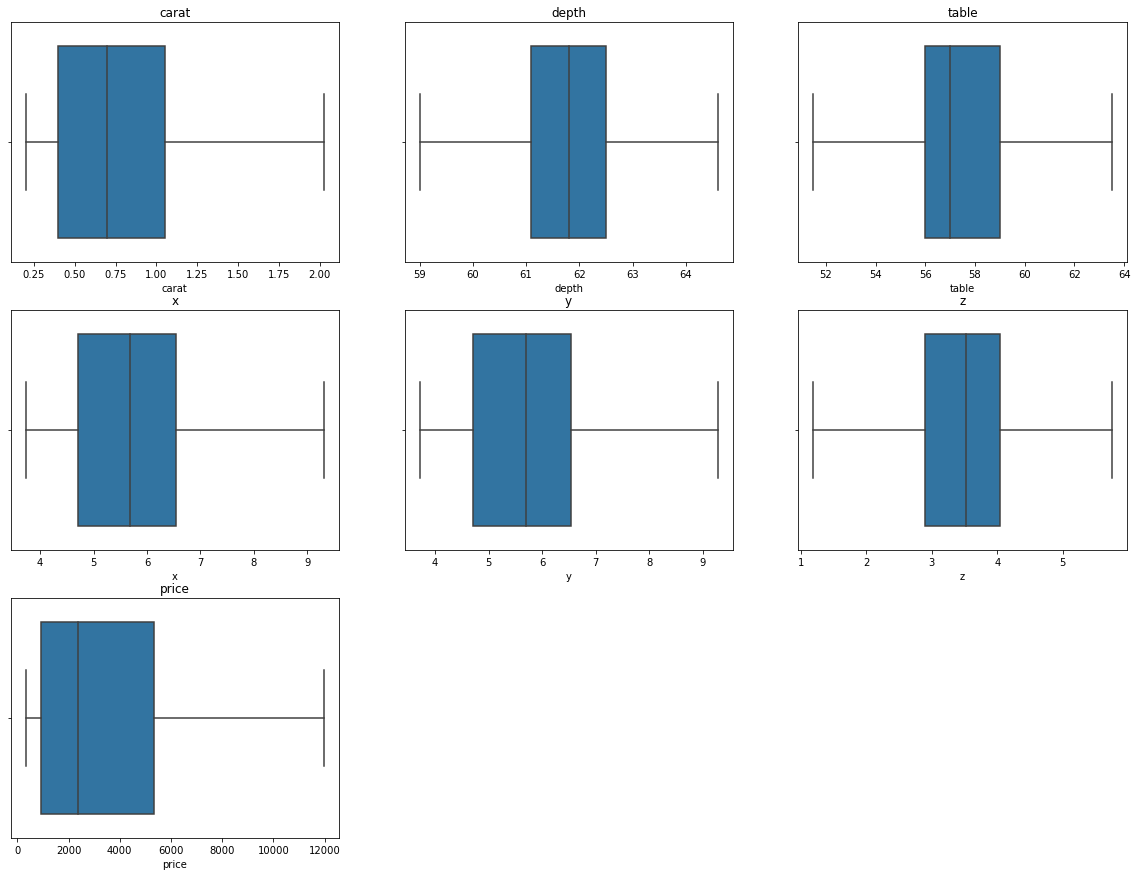

In [586]:
plt.figure(figsize=(20,15))
for idx,col in enumerate(num_cols):
    plt.subplot(3,3,idx+1)
    sns.boxplot(x=modified_df1[col])
    plt.title(col)

In [587]:
X=modified_df1.drop('price',axis=1)
y=modified_df1[['price']]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
reg_model_outlier=LinearRegression()
reg_model_outlier.fit(X_train,y_train)



LinearRegression()

In [588]:
for idx, col_name in enumerate(X_train.columns):
    print("The coefficient for {} is {}".format(col_name, reg_model_outlier.coef_[0][idx]))

The coefficient for carat is 8679.681971437753
The coefficient for cut is 115.5298092012355
The coefficient for color is -276.6788906926656
The coefficient for clarity is -436.261021175506
The coefficient for depth is 10.636344960638267
The coefficient for table is -9.046832728371854
The coefficient for x is -1401.2721602058302
The coefficient for y is 1417.0494715730729
The coefficient for z is -519.1005907004283


In [589]:

intercept = reg_model_outlier.intercept_[0]

print("The intercept for our model is {}".format(intercept))

The intercept for our model is 1158.6482068062237


In [590]:
reg_model_outlier.score(X_train,y_train)

0.9312271250404948

In [591]:
reg_model_outlier.score(X_test,y_test)

0.9310424764964393

In [592]:
predicted_train=reg_model_outlier.predict(X_train)
np.sqrt(mean_squared_error(y_train,predicted_train))

907.8137085655962

In [593]:
np.sqrt(mean_squared_error(y_true=y_test,y_pred=reg_model_outlier.predict(X_test)))

914.6615733653666

In [594]:
models=models.append(pd.DataFrame({'R2_TRAIN':reg_model_outlier.score(X_train,y_train),
             'R2_TEST':reg_model_outlier.score(X_test,y_test),
             'MSE_TRAIN':np.sqrt(mean_squared_error(y_true=y_train,y_pred=reg_model_outlier.predict(X_train))),
             'MSE_TEST':np.sqrt(mean_squared_error(y_true=y_test,y_pred=reg_model_outlier.predict(X_test)))},
            index=['sk_model_w/o_outlier']))

In [595]:
models

,R2_TRAIN,R2_TEST,MSE_TRAIN,MSE_TEST
sk_model_with_outlier,0.908381,0.907937,1212.322208,1232.630663
sk_model_w/o_outlier,0.931227,0.931042,907.813709,914.661573


## MODEL 3: GROUPING CATEGORY VARIABLES

In [596]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    26933 non-null  float64 
 1   cut      26933 non-null  category
 2   color    26933 non-null  category
 3   clarity  26933 non-null  category
 4   depth    26933 non-null  float64 
 5   table    26933 non-null  float64 
 6   x        26933 non-null  float64 
 7   y        26933 non-null  float64 
 8   z        26933 non-null  float64 
 9   price    26933 non-null  int64   
dtypes: category(3), float64(6), int64(1)
memory usage: 3.0 MB


In [597]:
df1.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [598]:
df1.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


From the anavo test we can see certain group does'nt have significant differences in their mean ,we can group variables with similar means.For the column clarity we have 8 levls we can reduce the levels by following steps:

In [599]:
data3=df1.copy()

data3['cut']=data3['cut'].map({'Fair':3, 'Good':2, 'Very Good':2, 'Premium':3, 'Ideal':4})
data3['color']=data3['color'].map({'D':2,'E':2,'F':3,'G':4,'H':5,'I':6,'J':6}).astype('int64')
data3['clarity']=data3['clarity'].map({'IF':2, 'VVS1':2, 'VVS2':3, 'VS1':4, 'VS2':4, 'SI1':5, 'SI2':6, 'I1':7}).astype('int64')
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26933 entries, 1 to 26967
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26933 non-null  float64
 1   cut      26933 non-null  int64  
 2   color    26933 non-null  int64  
 3   clarity  26933 non-null  int64  
 4   depth    26933 non-null  float64
 5   table    26933 non-null  float64
 6   x        26933 non-null  float64
 7   y        26933 non-null  float64
 8   z        26933 non-null  float64
 9   price    26933 non-null  int64  
dtypes: float64(6), int64(4)
memory usage: 3.5 MB


In [600]:
for column in data3[num_cols].columns:
    lr,ur=remove_outlier(data3[column])
    data3[column]=np.where(data3[column]>ur,ur,data3[column])
    data3[column]=np.where(data3[column]<lr,lr,data3[column])
data3[num_cols].apply(q1_q3)

,carat,depth,table,x,y,z,price
0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0


In [601]:
X = data3.drop('price', axis=1)
y = data3[['price']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3 , random_state=42)
data_train = pd.concat([X_train, y_train], axis=1)
data_test=pd.concat([X_test,y_test],axis=1)
data_train.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
88,1.26,4,6,4,63.2,57.0,6.86,6.81,4.32,5306.0
21605,1.07,4,3,5,60.6,57.0,6.62,6.67,1.19,5909.0
12267,1.02,2,6,4,59.3,59.0,6.56,6.60,3.90,4532.0
21742,1.52,3,6,4,62.2,59.0,7.32,7.38,4.57,8426.0
24702,0.50,4,6,4,61.4,58.0,5.14,5.09,3.15,1134.0


In [602]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18853 entries, 88 to 23682
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    18853 non-null  float64
 1   cut      18853 non-null  int64  
 2   color    18853 non-null  int64  
 3   clarity  18853 non-null  int64  
 4   depth    18853 non-null  float64
 5   table    18853 non-null  float64
 6   x        18853 non-null  float64
 7   y        18853 non-null  float64
 8   z        18853 non-null  float64
 9   price    18853 non-null  float64
dtypes: float64(7), int64(3)
memory usage: 1.6 MB


In [603]:
expr='price~carat+cut+color+clarity+depth+table+x+y+z'

In [604]:
lm_model3=ols(formula=expr,data=data_train).fit()


In [605]:
print(lm_model3.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 2.837e+04
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:52:40   Log-Likelihood:            -1.5515e+05
No. Observations:               18853   AIC:                         3.103e+05
Df Residuals:                   18843   BIC:                         3.104e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5424.1693    706.373      7.679      0.0

In [606]:
lm_model3.params

Intercept    5424.169293
carat        8701.379059
cut            54.049103
color        -315.455754
clarity      -615.772129
depth         -21.418942
table         -32.102233
x           -1301.130848
y            1316.204192
z            -525.012425
dtype: float64

In [607]:
np.sqrt(lm_model3.mse_resid)

907.7621208604987

In [608]:
mse_train = np.mean((lm_model3.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
np.sqrt(mse_train)

907.5213415345274

In [609]:
mse_test = np.mean((lm_model3.predict(data_test.drop('price',axis=1))-data_test['price'])**2)
np.sqrt(mse_test)

910.0085747150519

In [610]:
models=models.append(pd.DataFrame({'R2_TRAIN':lm_model3.rsquared,
             'R2_TEST':np.nan,
             'MSE_TRAIN':np.sqrt(mse_train),
             'MSE_TEST':np.sqrt(mse_test)},index=['ols_w/o_grouped']))

In [611]:
models

,R2_TRAIN,R2_TEST,MSE_TRAIN,MSE_TEST
sk_model_with_outlier,0.908381,0.907937,1212.322208,1232.630663
sk_model_w/o_outlier,0.931227,0.931042,907.813709,914.661573
ols_w/o_grouped,0.931271,NaN,907.521342,910.008575


## MODEL 4

In [612]:
expr='price~carat+cut+color+clarity+table+x+y+z'
lm_model4=ols(formula=expr,data=data_train).fit()
print(lm_model4.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.931
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                 3.191e+04
Date:                Sat, 02 Oct 2021   Prob (F-statistic):               0.00
Time:                        20:52:41   Log-Likelihood:            -1.5516e+05
No. Observations:               18853   AIC:                         3.103e+05
Df Residuals:                   18844   BIC:                         3.104e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3912.4106    256.372     15.261      0.0

In [613]:
lm_model4.params

Intercept    3912.410618
carat        8673.091483
cut            58.441270
color        -315.720880
clarity      -616.664088
table         -29.736333
x           -1264.178577
y            1401.983555
z            -704.937175
dtype: float64

In [614]:
vif=[variance_inflation_factor(data_train.values,ix) for ix in range(data_train.shape[1])]
for idx,col in enumerate(data_train.columns):
    print(col,' : ',vif[idx])

carat  :  188.21205043758482
cut  :  17.673175824448442
color  :  10.28406462358568
clarity  :  26.610386207883632
depth  :  1008.9166827720204
table  :  777.6901499673452
x  :  11021.871158594366
y  :  9865.812996021572
z  :  2094.358475170332
price  :  31.439687977776586


In [615]:
mse_train = np.mean((lm_model4.predict(data_train.drop('price',axis=1))-data_train['price'])**2)
np.sqrt(mse_train)

907.6483615163512

In [616]:
mse_test = np.mean((lm_model4.predict(data_test.drop('price',axis=1))-data_test['price'])**2)
np.sqrt(mse_test)

910.8823334154628

In [617]:
models=models.append(pd.DataFrame({'R2_TRAIN':lm_model4.rsquared,
             'R2_TEST':np.nan,
             'MSE_TRAIN':np.sqrt(mse_train),
             'MSE_TEST':np.sqrt(mse_test)},index=['ols23_w/o_grouped']))
models

,R2_TRAIN,R2_TEST,MSE_TRAIN,MSE_TEST
sk_model_with_outlier,0.908381,0.907937,1212.322208,1232.630663
sk_model_w/o_outlier,0.931227,0.931042,907.813709,914.661573
ols_w/o_grouped,0.931271,NaN,907.521342,910.008575
ols23_w/o_grouped,0.931252,NaN,907.648362,910.882333


Text(0, 0.5, 'Residual')

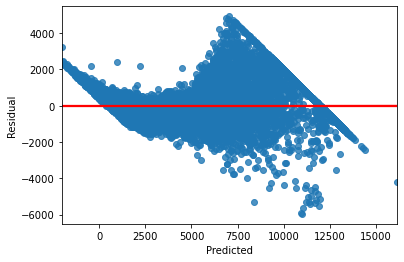

In [618]:
sns.regplot(x=lm_model4.predict(X_train),y=lm_model4.resid,line_kws={'color': 'red'})
plt.xlabel('Predicted')
plt.ylabel('Residual')

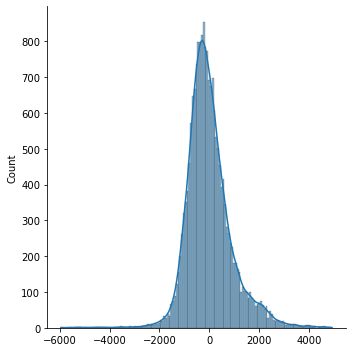

In [436]:
sns.displot(lm_model4.resid,kde=True)

In [437]:
lm_model4.resid.mean()

9.62882711322155e-11

# CLASSIFICATION USING LDA AND LOGISTIC REGRESSION:HOLIDAY 

In [3]:
df2=pd.read_csv('Holiday_Package.csv',index_col=0)

In [5]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no


In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 872 entries, 1 to 872
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Holliday_Package   872 non-null    object
 1   Salary             872 non-null    int64 
 2   age                872 non-null    int64 
 3   educ               872 non-null    int64 
 4   no_young_children  872 non-null    int64 
 5   no_older_children  872 non-null    int64 
 6   foreign            872 non-null    object
dtypes: int64(5), object(2)
memory usage: 54.5+ KB


In [7]:
df2.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Holliday_Package,872,2,no,471,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Salary,872,NaN,NaN,NaN,47729.2,23418.7,1322,35324,41903.5,53469.5,236961
age,872,NaN,NaN,NaN,39.9553,10.5517,20,32,39,48,62
educ,872,NaN,NaN,NaN,9.30734,3.03626,1,8,9,12,21
no_young_children,872,NaN,NaN,NaN,0.311927,0.61287,0,0,0,0,3
no_older_children,872,NaN,NaN,NaN,0.982798,1.08679,0,0,1,2,6
foreign,872,2,no,656,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df2.no_young_children.unique()

array([1, 0, 2, 3], dtype=int64)

In [9]:
df2.no_older_children.unique()

array([1, 0, 2, 4, 3, 5, 6], dtype=int64)

In [10]:
df2.isna().sum()

Holliday_Package     0
Salary               0
age                  0
educ                 0
no_young_children    0
no_older_children    0
foreign              0
dtype: int64

In [11]:
df2.duplicated().sum()

0

In [12]:
#df2.no_young_children=pd.Categorical(df2.no_young_children)
#df2.no_older_children=pd.Categorical(df2.no_older_children)

In [13]:
num_cols=df2.dtypes[df2.dtypes=='int64'].index
num_cols

Index(['Salary', 'age', 'educ', 'no_young_children', 'no_older_children'], dtype='object')

E:\ProgramFiles\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
E:\ProgramFiles\anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
E:\ProgramFiles\anaconda\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  w

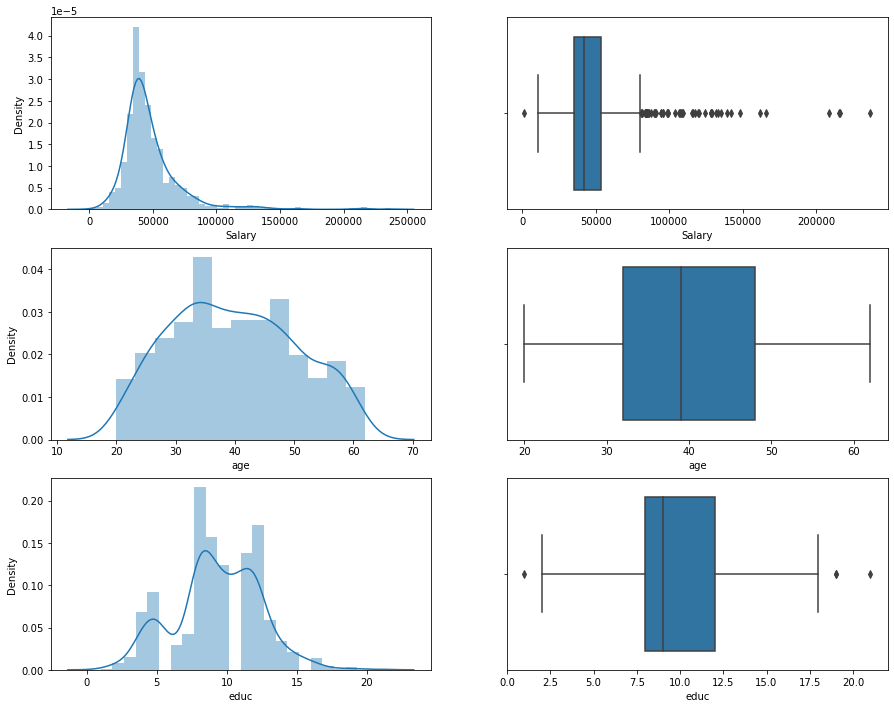

In [14]:
fig,ax=plt.subplots(3,2,figsize=(15,12))

for idx,col in enumerate(['Salary', 'age', 'educ']):
    sns.distplot(df2[col],ax=ax[idx][0])
    sns.boxplot(df2[col],ax=ax[idx][1])

In [15]:
df2.skew()

Salary               3.103216
age                  0.146412
educ                -0.045501
no_young_children    1.946515
no_older_children    0.953951
dtype: float64

Text(0, 0.5, 'count')

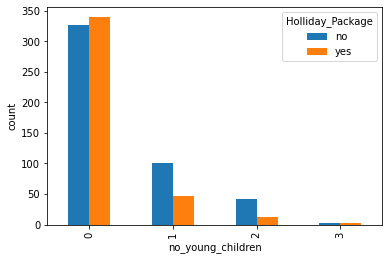

In [16]:
pd.crosstab(df2.no_young_children,df2.Holliday_Package).plot(kind='bar')
plt.ylabel('count')

In [17]:
pd.crosstab(columns=df2.no_young_children,index=df2.Holliday_Package,normalize=True)

no_young_children,0,1,2,3
Holliday_Package,,,,
no,0.373853,0.114679,0.048165,0.003440
yes,0.388761,0.053899,0.014908,0.002294


In [18]:
chi2,pval,dof,exp=chi2_contingency(pd.crosstab(columns=df2.no_young_children,index=df2.Holliday_Package),correction=False)
print(chi2,pval)
print(pval<0.05)

29.42423499061309 1.8237820703219062e-06
True


Text(0, 0.5, 'count')

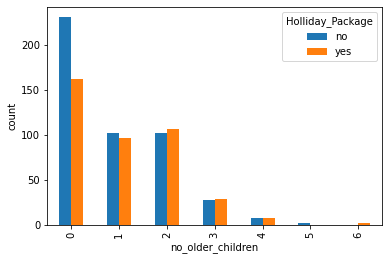

In [19]:
pd.crosstab(df2.no_older_children,df2.Holliday_Package).plot(kind='bar')
plt.ylabel('count')

In [20]:
pd.crosstab(columns=df2.no_older_children,index=df2.Holliday_Package,normalize=True)

no_older_children,0,1,2,3,4,5,6
Holliday_Package,,,,,,,
no,0.264908,0.116972,0.116972,0.030963,0.008028,0.002294,0.000000
yes,0.185780,0.110092,0.121560,0.032110,0.008028,0.000000,0.002294


In [21]:
chi2,pval,dof,exp=chi2_contingency(pd.crosstab(columns=df2.no_older_children,index=df2.Holliday_Package),correction=False)
print(chi2,pval)
print(pval<0.05)

10.842028086831869 0.09338317795013049
False


Text(0, 0.5, 'count')

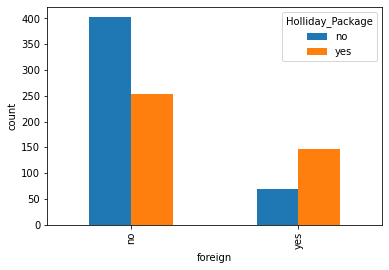

In [22]:
pd.crosstab(df2.foreign,df2.Holliday_Package).plot(kind='bar')
plt.ylabel('count')

In [23]:
pd.crosstab(columns=df2.foreign,index=df2.Holliday_Package,normalize=True)

foreign,no,yes
Holliday_Package,,
no,0.461009,0.079128
yes,0.291284,0.168578


In [24]:
chi2,pval,dof,exp=chi2_contingency(pd.crosstab(columns=df2.foreign,index=df2.Holliday_Package),correction=False)
print(chi2,pval)
print(pval<0.05)

56.3004509508856 6.220115821112491e-14
True


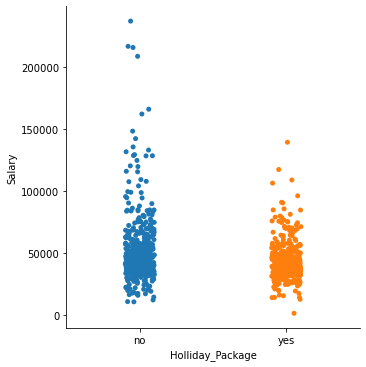

In [25]:
sns.catplot(data=df2,x='Holliday_Package',y='Salary')

<AxesSubplot:xlabel='Holliday_Package', ylabel='Salary'>

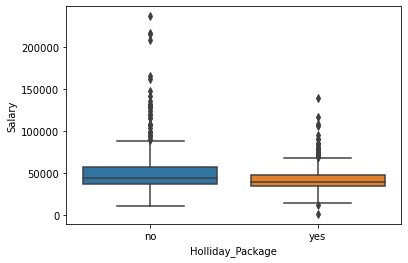

In [26]:
sns.boxplot(data=df2,x='Holliday_Package',y='Salary')

In [27]:
df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,no,48412,30,8,1,1,no
2,yes,37207,45,8,0,1,no
3,no,58022,46,9,0,0,no
4,no,66503,31,11,2,0,no
5,no,66734,44,12,0,2,no


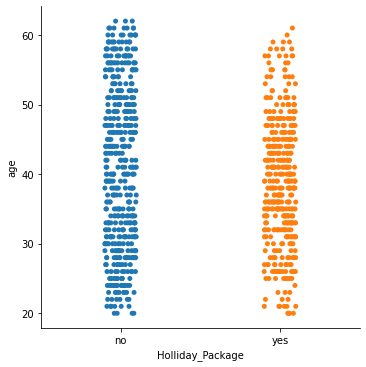

In [28]:
sns.catplot(data=df2,x='Holliday_Package',y='age')

<AxesSubplot:xlabel='Holliday_Package', ylabel='age'>

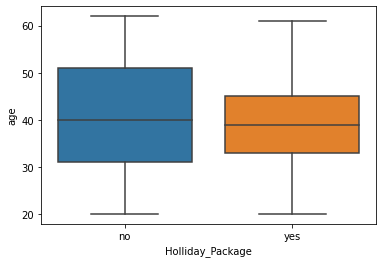

In [29]:
sns.boxplot(data=df2,x='Holliday_Package',y='age')

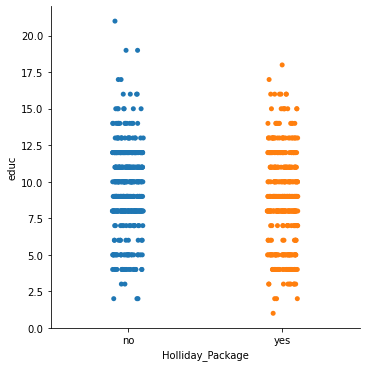

In [30]:
sns.catplot(data=df2,x='Holliday_Package',y='educ')

<AxesSubplot:xlabel='Holliday_Package', ylabel='educ'>

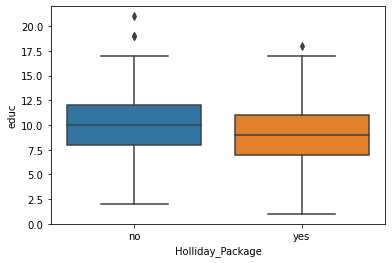

In [31]:
sns.boxplot(data=df2,x='Holliday_Package',y='educ')

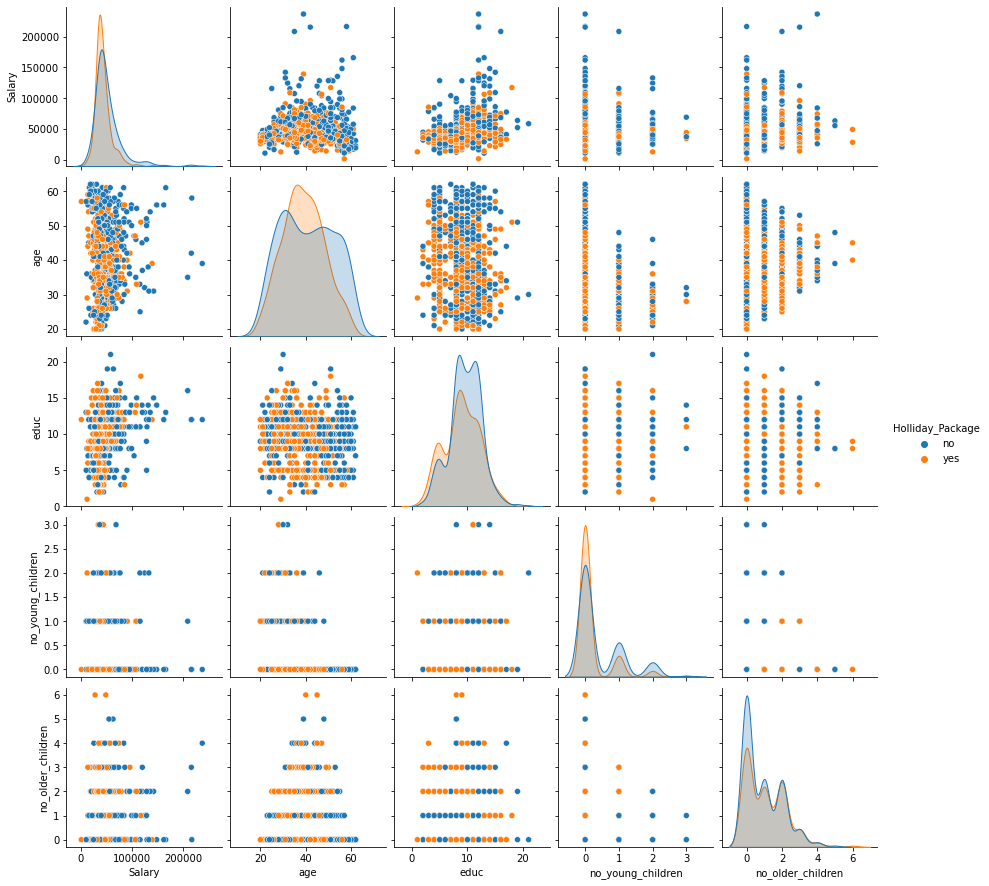

In [32]:
sns.pairplot(data=df2,hue='Holliday_Package')

<AxesSubplot:>

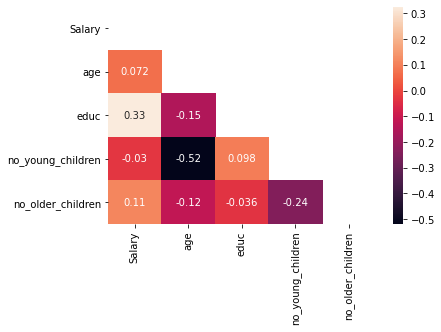

In [33]:
sns.heatmap(df2.corr(),mask=np.triu(df2.corr()),annot=True)

In [38]:
df2[['Salary', 'age', 'educ']].apply(q1_q3,axis=0)

,Salary,age,educ
0,1,0,1
1,56,0,3


## MODEL DEVELOPMENT

In [39]:
df2.Holliday_Package=df2.Holliday_Package.map({'no':0,'yes':1})
df2.foreign=df2.foreign.map({'no':0,'yes':1})

df2.head()

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,0,48412,30,8,1,1,0
2,1,37207,45,8,0,1,0
3,0,58022,46,9,0,0,0
4,0,66503,31,11,2,0,0
5,0,66734,44,12,0,2,0


In [40]:
pd.get_dummies(data=df2,columns=['foreign','no_young_children'],drop_first=True)

,Holliday_Package,Salary,age,educ,no_older_children,foreign_1,no_young_children_1,no_young_children_2,no_young_children_3
1,0,48412,30,8,1,0,1,0,0
2,1,37207,45,8,1,0,0,0,0
3,0,58022,46,9,0,0,0,0,0
4,0,66503,31,11,0,0,0,1,0
5,0,66734,44,12,2,0,0,0,0
...,...,...,...,...,...,...,...,...,...
868,0,40030,24,4,1,1,0,1,0
869,1,32137,48,8,0,1,0,0,0
870,0,25178,24,6,0,1,0,1,0
871,1,55958,41,10,1,1,0,0,0


In [86]:
df2

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign
1,0,48412.0,30.0,8.0,1,1,0
2,1,37207.0,45.0,8.0,0,1,0
3,0,58022.0,46.0,9.0,0,0,0
4,0,66503.0,31.0,11.0,2,0,0
5,0,66734.0,44.0,12.0,0,2,0
...,...,...,...,...,...,...,...
868,0,40030.0,24.0,4.0,2,1,1
869,1,32137.0,48.0,8.0,0,0,1
870,0,25178.0,24.0,6.0,2,0,1
871,1,55958.0,41.0,10.0,0,1,1


In [41]:
X=pd.get_dummies(data=df2,columns=['foreign','no_young_children'],drop_first=True).drop(['Holliday_Package','no_older_children'],axis=1)
y=df2['Holliday_Package']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train

,Salary,age,educ,foreign_1,no_young_children_1,no_young_children_2,no_young_children_3
182,64656,33,12,0,1,0,0
779,42008,25,7,1,1,0,0
70,30225,20,9,0,1,0,0
132,90827,31,11,0,1,0,0
443,44023,33,9,0,0,0,0
...,...,...,...,...,...,...,...
107,64928,46,10,0,0,0,0
271,46951,28,12,0,1,0,0
861,37380,34,9,1,1,0,0
436,28158,40,9,0,0,0,0


In [42]:
log_model_1 = LogisticRegression()
log_model_1.fit(X_train, y_train)
y_predict = log_model_1.predict(X_test)
model_score = log_model_1.score(X_test, y_test)
print(model_score)
print(confusion_matrix(y_predict,y_test ))
print(classification_report(y_predict,y_test ))

0.5343511450381679
[[140 122]
 [  0   0]]
              precision    recall  f1-score   support

           0       1.00      0.53      0.70       262
           1       0.00      0.00      0.00         0

    accuracy                           0.53       262
   macro avg       0.50      0.27      0.35       262
weighted avg       1.00      0.53      0.70       262



C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [43]:
log_model_1.coef_

array([[-5.97391851e-06,  1.52937675e-09,  8.45805573e-10,
         4.34500014e-10, -1.79126492e-10, -1.00089584e-10,
         2.53625639e-12]])

In [44]:
for column in df2[['Salary', 'age', 'educ']].columns:
    lr,ur=remove_outlier(df2[column])
    df2[column]=np.where(df2[column]>ur,ur,df2[column])
    df2[column]=np.where(df2[column]<lr,lr,df2[column])
df2[num_cols].apply(q1_q3)


,Salary,age,educ,no_young_children,no_older_children
0,0,0,0,0,0
1,0,0,0,207,2


In [45]:
X=pd.get_dummies(data=df2,columns=['foreign','no_young_children'],drop_first=True).drop(['Holliday_Package','no_older_children'],axis=1)
y=df2['Holliday_Package']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train

,Salary,age,educ,foreign_1,no_young_children_1,no_young_children_2,no_young_children_3
182,64656.00,33.0,12.0,0,1,0,0
779,42008.00,25.0,7.0,1,1,0,0
70,30225.00,20.0,9.0,0,1,0,0
132,80687.75,31.0,11.0,0,1,0,0
443,44023.00,33.0,9.0,0,0,0,0
...,...,...,...,...,...,...,...
107,64928.00,46.0,10.0,0,0,0,0
271,46951.00,28.0,12.0,0,1,0,0
861,37380.00,34.0,9.0,1,1,0,0
436,28158.00,40.0,9.0,0,0,0,0


In [46]:
log_model_2 = LogisticRegression()
log_model_2.fit(X_train, y_train)

LogisticRegression()

### METRICS OF TRAINING DATA

In [47]:
model_score = log_model_2.score(X_train, y_train)
print('Accuracy score',model_score)
print('\n')
y_predict = log_model_2.predict(X_train)
print(classification_report(y_predict,y_train))

#report=classification_report(y_predict,y_train,output_dict=True)



Accuracy score 0.5426229508196722


              precision    recall  f1-score   support

           0       1.00      0.54      0.70       610
           1       0.00      0.00      0.00         0

    accuracy                           0.54       610
   macro avg       0.50      0.27      0.35       610
weighted avg       1.00      0.54      0.70       610



C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [48]:
for idx,col in enumerate(X_train.columns):
    print('The coefficient of {} is :'.format(str.upper(col)),log_model_2.coef_[0][idx])
print('The intercept of the model is',log_model_2.intercept_)

The coefficient of SALARY is : -5.632273118007217e-06
The coefficient of AGE is : 1.619535162982597e-09
The coefficient of EDUC is : 1.3387090625369774e-09
The coefficient of FOREIGN_1 is : 8.565227500234058e-10
The coefficient of NO_YOUNG_CHILDREN_1 is : -3.564461620526026e-10
The coefficient of NO_YOUNG_CHILDREN_2 is : -1.9922550002143942e-10
The coefficient of NO_YOUNG_CHILDREN_3 is : 5.070907506976367e-12
The intercept of the model is [2.20508424e-10]


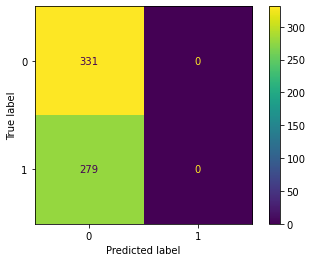

In [49]:
#print(confusion_matrix(y_predict,y_test ))
plot_confusion_matrix(log_model_2,X_train,y_train)

### AUC and ROC for the training data

AUC: 0.591


C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


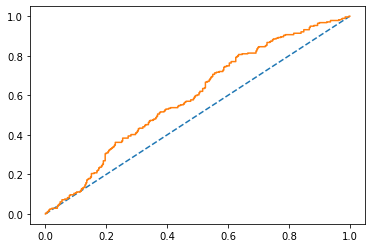

In [50]:
# predict probabilities
probs = log_model_2.predict_proba(X_train)[:, 1] # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);





report=classification_report(y_predict,y_train,output_dict=True)

models_clf=pd.DataFrame({'Accuracy':model_score,
                         'Precision':report['1']['precision'],
                         'Recall':report['1']['recall'],
                         'AUC':auc
                         },index=['Log_clf_train'])




## METRICS OF TEST DATA

In [51]:
model_score = log_model_2.score(X_test, y_test)
print('Accuracy score',model_score)
print('\n')
y_predict = log_model_2.predict(X_test)
print(classification_report(y_predict,y_test))

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy score 0.5343511450381679


              precision    recall  f1-score   support

           0       1.00      0.53      0.70       262
           1       0.00      0.00      0.00         0

    accuracy                           0.53       262
   macro avg       0.50      0.27      0.35       262
weighted avg       1.00      0.53      0.70       262



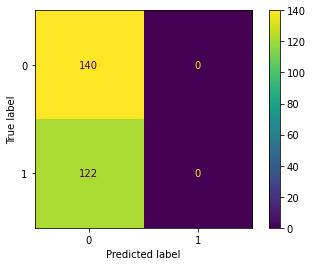

In [52]:
plot_confusion_matrix(log_model_2,X_test,y_test)

AUC: 0.632


C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


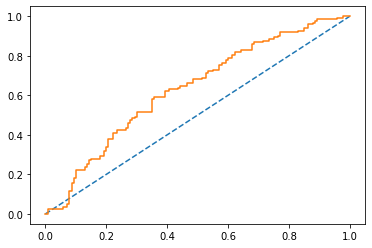

In [53]:
# predict probabilities
probs = log_model_2.predict_proba(X_test)[:, 1] # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr,tpr,thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);







report=classification_report(y_predict,y_test,output_dict=True)

models_clf=models_clf.append(pd.DataFrame({'Accuracy':model_score,
                         'Precision':report['1']['precision'],
                         'Recall':report['1']['recall'],
                         'AUC':auc
                         },index=['Log_clf_test']))


## Applying GridSearchCV for Logistic Regression 

In [54]:
grid_param={'penalty':['l2','none'],
      'solver':['sag','lbfgs','newton-cg'],
      'tol':[0.0001,0.00001]}

In [55]:
grid_search = GridSearchCV(estimator = LogisticRegression(max_iter=10000,n_jobs=2), param_grid = grid_param, cv = 3,n_jobs=-1)

In [56]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=LogisticRegression(max_iter=10000, n_jobs=2),
             n_jobs=-1,
             param_grid={'penalty': ['l2', 'none'],
                         'solver': ['sag', 'lbfgs', 'newton-cg'],
                         'tol': [0.0001, 1e-05]})

In [57]:
print(grid_search.best_estimator_)
print(grid_search.best_params_)

LogisticRegression(max_iter=10000, n_jobs=2, penalty='none', solver='newton-cg')
{'penalty': 'none', 'solver': 'newton-cg', 'tol': 0.0001}


In [58]:
best_model=grid_search.best_estimator_

### METRICS OF TRAINING DATA

In [59]:
model_score = best_model.score(X_train, y_train)
print('Accuracy score',model_score)
print('\n')
y_predict = best_model.predict(X_train)
print(classification_report(y_predict,y_train ))

Accuracy score 0.660655737704918


              precision    recall  f1-score   support

           0       0.73      0.67      0.70       362
           1       0.57      0.65      0.61       248

    accuracy                           0.66       610
   macro avg       0.65      0.66      0.65       610
weighted avg       0.67      0.66      0.66       610



In [60]:
for idx,col in enumerate(X_train.columns):
    print('The coefficient of {} is :'.format(str.upper(col)),log_model_2.coef_[0][idx])
print('The intercept of the model is',log_model_2.intercept_)

The coefficient of SALARY is : -5.632273118007217e-06
The coefficient of AGE is : 1.619535162982597e-09
The coefficient of EDUC is : 1.3387090625369774e-09
The coefficient of FOREIGN_1 is : 8.565227500234058e-10
The coefficient of NO_YOUNG_CHILDREN_1 is : -3.564461620526026e-10
The coefficient of NO_YOUNG_CHILDREN_2 is : -1.9922550002143942e-10
The coefficient of NO_YOUNG_CHILDREN_3 is : 5.070907506976367e-12
The intercept of the model is [2.20508424e-10]


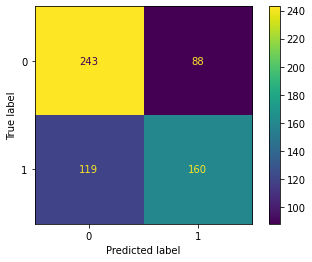

In [61]:
plot_confusion_matrix(best_model,X_train,y_train)

AUC: 0.736


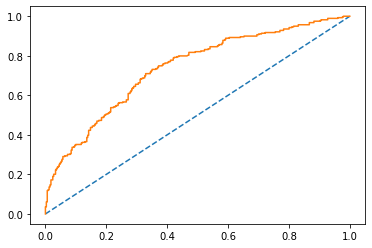

In [62]:
# predict probabilities
probs = best_model.predict_proba(X_train)[:, 1] # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);



report=classification_report(y_predict,y_train,output_dict=True)

models_clf=models_clf.append(pd.DataFrame({'Accuracy':model_score,
                         'Precision':report['1']['precision'],
                         'Recall':report['1']['recall'],
                         'AUC':auc
                         },index=['Log_clf_GridSearch_train']))


### METRICS ON TEST DATA

In [63]:
model_score = best_model.score(X_test, y_test)
print('Accuracy score',model_score)
print('\n')
y_predict = best_model.predict(X_test)
print(classification_report(y_predict,y_test))

Accuracy score 0.6603053435114504


              precision    recall  f1-score   support

           0       0.76      0.66      0.71       163
           1       0.54      0.67      0.60        99

    accuracy                           0.66       262
   macro avg       0.65      0.66      0.65       262
weighted avg       0.68      0.66      0.67       262



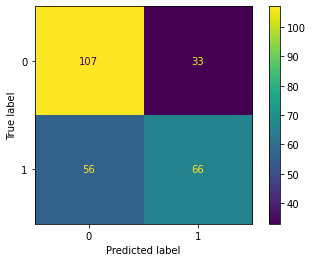

In [64]:
plot_confusion_matrix(best_model,X_test,y_test)

AUC: 0.739


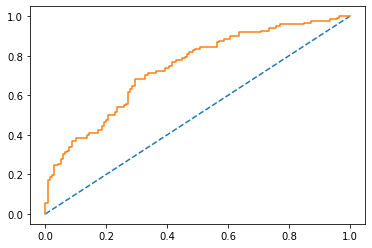

In [65]:
# predict probabilities
probs = best_model.predict_proba(X_test)[:, 1] # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);


report=classification_report(y_predict,y_test,output_dict=True)

models_clf=models_clf.append(pd.DataFrame({'Accuracy':model_score,
                         'Precision':report['1']['precision'],
                         'Recall':report['1']['recall'],
                         'AUC':auc
                         },index=['Log_clf_GridSearch_test']))


## LDA

In [66]:
lda_model=LinearDiscriminantAnalysis()
lda_model.fit(X_train,y_train)


LinearDiscriminantAnalysis()

### METRICS ON TRAINING DATA

In [67]:
model_score = lda_model.score(X_train, y_train)
print('Accuracy score',model_score)
print('\n')
y_predict = lda_model.predict(X_train)
print(classification_report(y_predict,y_train ))

Accuracy score 0.660655737704918


              precision    recall  f1-score   support

           0       0.74      0.67      0.70       364
           1       0.57      0.65      0.61       246

    accuracy                           0.66       610
   macro avg       0.65      0.66      0.65       610
weighted avg       0.67      0.66      0.66       610



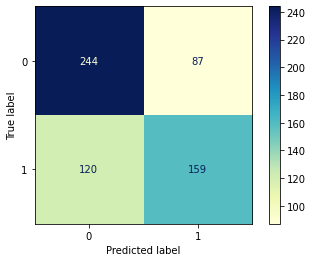

In [68]:
plot_confusion_matrix(lda_model,X_train,y_train,cmap='YlGnBu');

AUC: 0.736


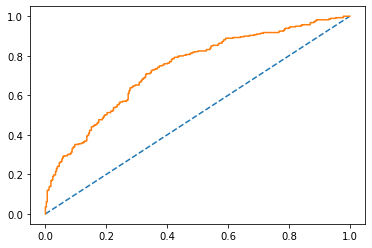

In [69]:
# predict probabilities
probs = lda_model.predict_proba(X_train)
# keep probabilities for the positive outcome only
probs = probs[:, 1]
# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


report=classification_report(y_predict,y_train,output_dict=True)

models_clf=models_clf.append(pd.DataFrame({'Accuracy':model_score,
                         'Precision':report['1']['precision'],
                         'Recall':report['1']['recall'],
                         'AUC':auc
                         },index=['LDA_train']))


### METRICS ON TEST DATA

In [70]:
model_score = lda_model.score(X_test, y_test)
print('Accuracy score',model_score)
print('\n')
y_predict = lda_model.predict(X_test)
print(classification_report(y_predict,y_test ))

Accuracy score 0.6526717557251909


              precision    recall  f1-score   support

           0       0.76      0.65      0.70       163
           1       0.53      0.66      0.59        99

    accuracy                           0.65       262
   macro avg       0.64      0.65      0.64       262
weighted avg       0.67      0.65      0.66       262



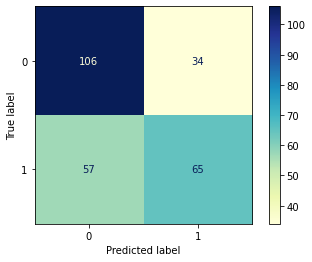

In [71]:
plot_confusion_matrix(lda_model,X_test,y_test,cmap='YlGnBu');

AUC: 0.738


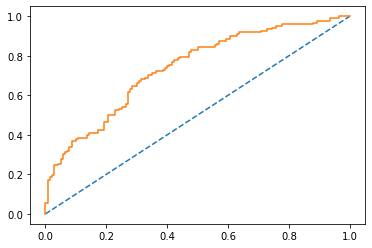

In [72]:
# predict probabilities
probs = lda_model.predict_proba(X_test)[:, 1] # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr);


report=classification_report(y_predict,y_test,output_dict=True)

models_clf=models_clf.append(pd.DataFrame({'Accuracy':model_score,
                         'Precision':report['1']['precision'],
                         'Recall':report['1']['recall'],
                         'AUC':auc
                         },index=['LDA_test']))

## APPLYING GRID SEARCH ON LDA

In [73]:
grid_param={'solver':['svd', 'lsqr', 'eigen'],
            'shrinkage':['auto','None']
           }

In [74]:
grid_search=GridSearchCV(estimator=LinearDiscriminantAnalysis(),param_grid=grid_param,cv=3)

In [75]:
grid_search.fit(X_train,y_train)

C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\discriminant_analysis.py", line 463, in fit
    raise NotImplementedError('shrinkage not supported')
NotImplementedError: shrinkage not supported

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\dell\AppData\Roaming\Python\Python38\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most re

GridSearchCV(cv=3, estimator=LinearDiscriminantAnalysis(),
             param_grid={'shrinkage': ['auto', 'None'],
                         'solver': ['svd', 'lsqr', 'eigen']})

In [76]:
grid_search.best_estimator_

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [77]:
grid_search.best_params_

{'shrinkage': 'auto', 'solver': 'lsqr'}

In [78]:
best_model=grid_search.best_estimator_

### METRICS ON TRAINING DATA

In [79]:
model_score = best_model.score(X_train, y_train)
print('Accuracy score',model_score)
print('\n')
y_predict = best_model.predict(X_train)
print(classification_report(y_predict,y_train ))

Accuracy score 0.6655737704918033


              precision    recall  f1-score   support

           0       0.79      0.66      0.72       397
           1       0.52      0.68      0.59       213

    accuracy                           0.67       610
   macro avg       0.65      0.67      0.65       610
weighted avg       0.70      0.67      0.67       610



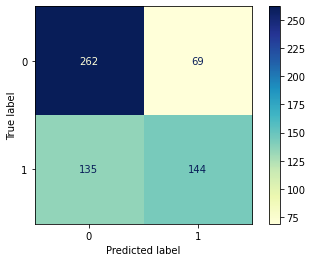

In [80]:
plot_confusion_matrix(best_model,X_train,y_train,cmap='YlGnBu')

AUC: 0.722


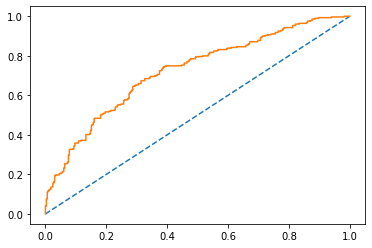

In [81]:
# predict probabilities
probs = best_model.predict_proba(X_train)[:, 1] # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_train, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
train_fpr, train_tpr, train_thresholds = roc_curve(y_train, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(train_fpr, train_tpr);


report=classification_report(y_predict,y_train,output_dict=True)

models_clf=models_clf.append(pd.DataFrame({'Accuracy':model_score,
                         'Precision':report['1']['precision'],
                         'Recall':report['1']['recall'],
                         'AUC':auc
                         },index=['LDA_GridSearch_train']))

### METRICS ON TEST DATA

In [82]:
model_score = best_model.score(X_test, y_test)
print('Accuracy score',model_score)
print('\n')
y_predict = best_model.predict(X_test)
print(classification_report(y_predict,y_test ))

Accuracy score 0.6755725190839694


              precision    recall  f1-score   support

           0       0.81      0.66      0.73       173
           1       0.52      0.71      0.60        89

    accuracy                           0.68       262
   macro avg       0.67      0.68      0.66       262
weighted avg       0.71      0.68      0.68       262



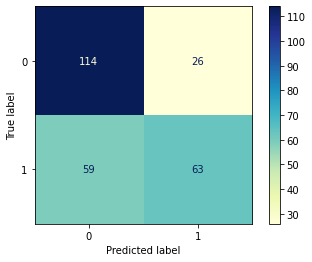

In [83]:
plot_confusion_matrix(best_model,X_test,y_test,cmap='YlGnBu')

AUC: 0.737


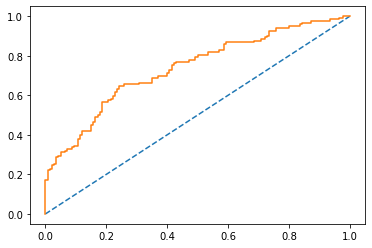

In [84]:
# predict probabilities
probs = best_model.predict_proba(X_test)[:, 1] # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr);



report=classification_report(y_predict,y_test,output_dict=True)

models_clf=models_clf.append(pd.DataFrame({'Accuracy':model_score,
                         'Precision':report['1']['precision'],
                         'Recall':report['1']['recall'],
                         'AUC':auc
                         },index=['LDA_GridSearch_test']))

In [85]:
models_clf

,Accuracy,Precision,Recall,AUC
Log_clf_train,0.542623,0.000000,0.000000,0.591295
Log_clf_test,0.534351,0.000000,0.000000,0.631850
Log_clf_GridSearch_train,0.660656,0.573477,0.645161,0.736104
Log_clf_GridSearch_test,0.660305,0.540984,0.666667,0.738525
LDA_train,0.660656,0.569892,0.646341,0.735909
LDA_test,0.652672,0.532787,0.656566,0.737588
LDA_GridSearch_train,0.665574,0.516129,0.676056,0.722320
LDA_GridSearch_test,0.675573,0.516393,0.707865,0.736944


In [127]:
sample=df2.copy()

In [152]:
sample.head(10)

,Holliday_Package,Salary,age,educ,no_young_children,no_older_children,foreign,old_children
1,0,48412.00,30.0,8.0,1,1,0,0
2,1,37207.00,45.0,8.0,0,1,0,0
3,0,58022.00,46.0,9.0,0,0,0,1
4,0,66503.00,31.0,11.0,2,0,0,1
5,0,66734.00,44.0,12.0,0,2,0,0
6,1,61590.00,42.0,12.0,0,1,0,0
7,0,80687.75,51.0,8.0,0,0,0,1
8,1,35987.00,32.0,8.0,0,2,0,0
9,0,41140.00,39.0,12.0,0,0,0,1
10,0,35826.00,43.0,11.0,0,2,0,0


In [208]:
#sample['old_children']=sample.no_older_children.map(lambda x : 1 if x==0 else 0 )
import scipy

In [247]:
sample[['no_young_children','no_older_children','foreign']].head(10).mode(axis=1)

,0
1,1
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0


In [ ]:
sample[['no_young_children','no_older_children','foreign']].mode

In [229]:
def transform(x):
    print (x)
    print(np.mean([x.no_young_children,x.no_older_children,x.foreign]))
    return (scipy.stats.mode([x.no_young_children,x.no_older_children,x.foreign]))


In [206]:
a=np.array([1,0,0])

In [216]:
1-(0.40)

-0.20000000000000018

Text(0, 0.5, 'count')

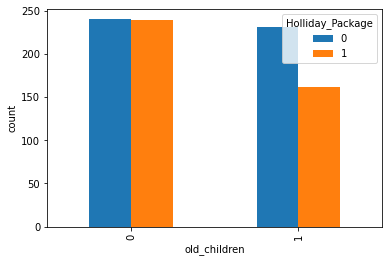

In [129]:
pd.crosstab(sample.old_children,sample.Holliday_Package).plot(kind='bar')
plt.ylabel('count')

In [143]:
X=pd.get_dummies(data=sample,columns=['foreign','no_young_children','no_older_children'],drop_first=True).drop(['Holliday_Package','no_older_children_1','no_older_children_4','no_older_children_5','no_older_children_6','no_older_children_3'],axis=1)
y=df2['Holliday_Package']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
X_train

,Salary,age,educ,old_children,foreign_1,no_young_children_1,no_young_children_2,no_young_children_3,no_older_children_2
182,64656.00,33.0,12.0,1,0,1,0,0,0
779,42008.00,25.0,7.0,0,1,1,0,0,0
70,30225.00,20.0,9.0,1,0,1,0,0,0
132,80687.75,31.0,11.0,1,0,1,0,0,0
443,44023.00,33.0,9.0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
107,64928.00,46.0,10.0,0,0,0,0,0,0
271,46951.00,28.0,12.0,1,0,1,0,0,0
861,37380.00,34.0,9.0,0,1,1,0,0,0
436,28158.00,40.0,9.0,0,0,0,0,0,0


In [121]:
grid_search.best_estimator_

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [144]:
best_model=grid_search.best_estimator_
best_model.fit(X_train,y_train)

LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')

In [145]:
model_score = best_model.score(X_train, y_train)
print('Accuracy score',model_score)
print('\n')
y_predict = best_model.predict(X_train)
print(classification_report(y_predict,y_train ))

Accuracy score 0.6721311475409836


              precision    recall  f1-score   support

           0       0.77      0.67      0.72       381
           1       0.55      0.67      0.61       229

    accuracy                           0.67       610
   macro avg       0.66      0.67      0.66       610
weighted avg       0.69      0.67      0.68       610



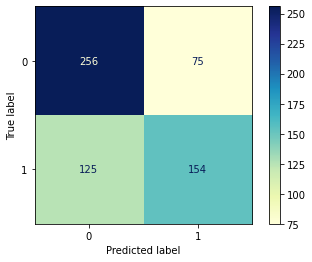

In [146]:
plot_confusion_matrix(best_model,X_train,y_train,cmap='YlGnBu')

In [139]:
0.665574	0.516129	0.676056	0.722320
0.675573	0.516393	0.707865	0.736944

SyntaxError: invalid syntax (<ipython-input-139-69249defe0cb>, line 1)

In [147]:
model_score = best_model.score(X_test, y_test)
print('Accuracy score',model_score)
print('\n')
y_predict = best_model.predict(X_test)
print(classification_report(y_predict,y_test ))

Accuracy score 0.683206106870229


              precision    recall  f1-score   support

           0       0.79      0.67      0.73       165
           1       0.56      0.70      0.62        97

    accuracy                           0.68       262
   macro avg       0.68      0.69      0.67       262
weighted avg       0.71      0.68      0.69       262



AUC: 0.739


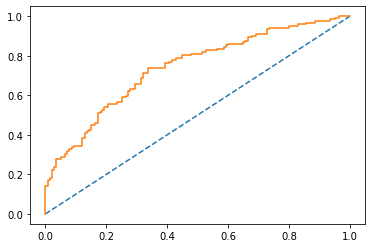

In [148]:
# predict probabilities
probs = best_model.predict_proba(X_test)[:, 1] # keep probabilities for the positive outcome only

# calculate AUC
auc = roc_auc_score(y_test, probs)
print('AUC: %.3f' % auc)
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, probs)
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr,tpr);
